In [2]:
#Prime def
def number_is_prime(n):
    """Check if a number is prime."""
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

# Check if the number 7 is prime
number_to_check = 7
if number_is_prime(number_to_check):
    print(f"{number_to_check} is a prime number.")
else:
    print(f"{number_to_check} is not a prime number.")

number_is_prime(7)
number_is_prime(10)

7 is a prime number.


False

In [3]:
# Define the range and the divisor
start = 1
end = 20
divisor = 3

# Use a list comprehension to find all numbers in the range that are divisible by the specific number
divisible_numbers = [num for num in range(start, end + 1) if num % divisor == 0]

# Print the result
print(f"Numbers in the range {start} to {end} that are divisible by {divisor}: {divisible_numbers}")


Numbers in the range 1 to 20 that are divisible by 3: [3, 6, 9, 12, 15, 18]


In [4]:
import pandas as pd

# Load the marketing dataset using the correct file path
marketing_data = pd.read_csv('/Users/manuel/Desktop/DI-Bootcamp/Week4_PreProcessing_Data/D2/Lessons/predictive_digital_marketing_campaign_dataset.csv')

# Display the first few rows of the dataset to understand its structure
print("Marketing Data:")
print(marketing_data.head())

Marketing Data:
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares 

In [5]:
def categorize_columns(df):
    quantitative = []
    qualitative = []
    
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            quantitative.append(column)
        else:
            qualitative.append(column)
    
    return quantitative, qualitative

# Apply the function to each dataset
marketing_quantitative, marketing_qualitative = categorize_columns(marketing_data)

# Display the results
print("marketing Data:")
print("Quantitative Columns:", marketing_quantitative)
print("Qualitative Columns:", marketing_qualitative)

marketing Data:
Quantitative Columns: ['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']
Qualitative Columns: ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']


In [6]:
# Calculate the mean, median, and standard deviation of the specified column
mean_value = marketing_data['Age'].mean()
median_value = marketing_data['Age'].median()
std_dev_value = marketing_data['Age'].std()

# Display the calculated statistics
print(f"\nBasic Data Analysis for Column: {'Age'}")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_dev_value}")


Basic Data Analysis for Column: Age
Mean: 43.6255
Median: 43.0
Standard Deviation: 14.902785356315848


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

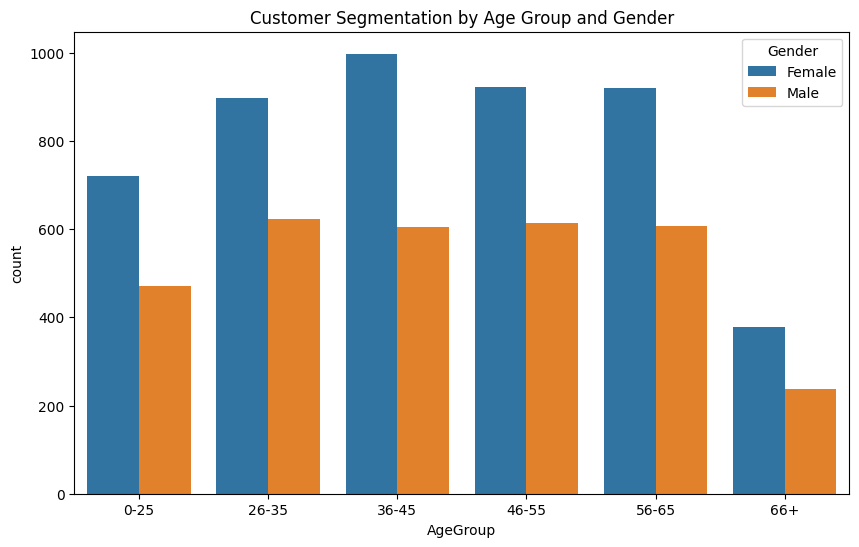

CampaignType     Awareness  Consideration  Conversion  Retention
AgeGroup Gender                                                 
0-25     Female        194            189         190        148
         Male          117            136         112        107
26-35    Female        243            209         231        215
         Male          173            143         142        166
36-45    Female        247            234         273        244
         Male          137            169         159        140
46-55    Female        226            222         239        235
         Male          148            159         144        163
56-65    Female        214            222         259        226
         Male          141            149         166        152
66+      Female         89             98          95         97
         Male           59             58          67         54


/var/folders/4n/_sfxdkln69z0380mkk8642fc0000gn/T/ipykernel_5704/3799835098.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation = marketing_data.groupby(['AgeGroup', 'Gender', 'CampaignType']).size().unstack(fill_value=0)


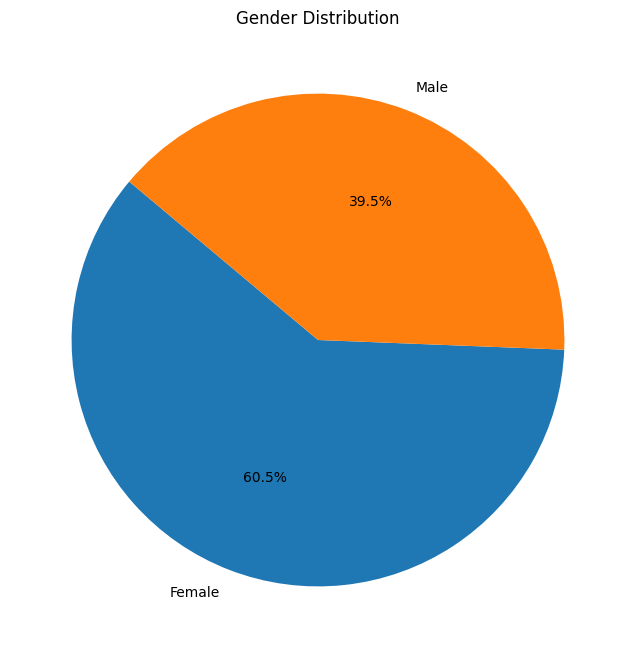

/var/folders/4n/_sfxdkln69z0380mkk8642fc0000gn/T/ipykernel_5704/3799835098.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation = marketing_data.groupby(['AgeGroup', 'CampaignType']).size().unstack(fill_value=0)


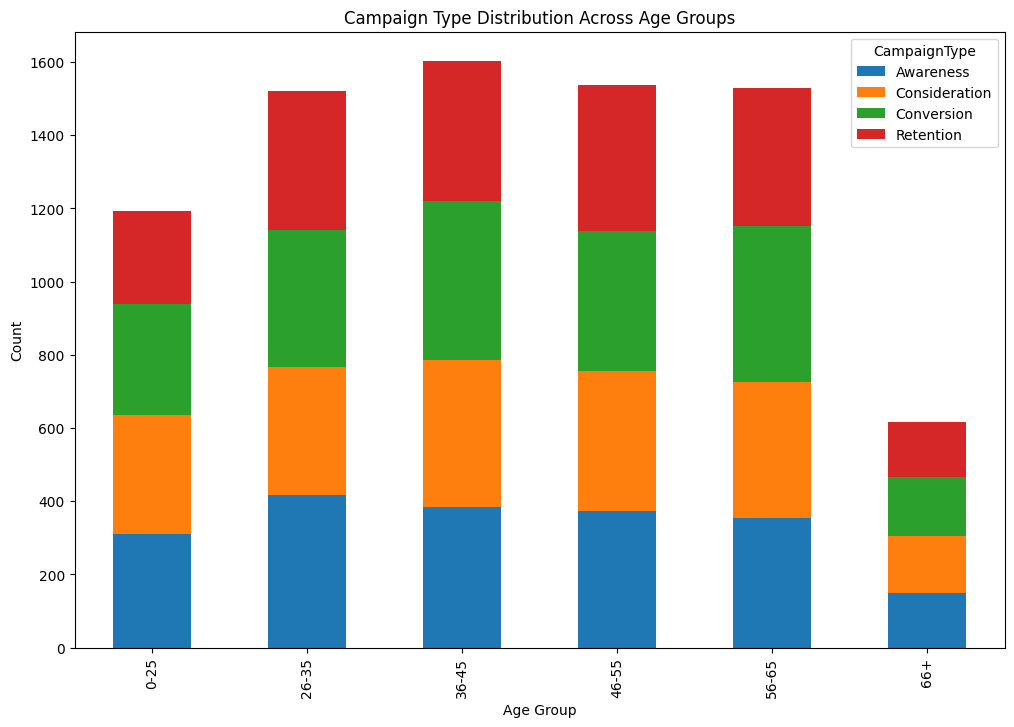

In [8]:
#CUSTOMER SEGMENTATION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the marketing dataset using the correct file path
marketing_data = pd.read_csv('/Users/manuel/Desktop/DI-Bootcamp/Week4_PreProcessing_Data/D2/Lessons/predictive_digital_marketing_campaign_dataset.csv')

# Customer Segmentation: Analyzing response by Age Group and Gender
marketing_data['AgeGroup'] = pd.cut(marketing_data['Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['0-25', '26-35', '36-45', '46-55', '56-65', '66+'])

# Plotting customer segmentation by Age Group and Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Gender', data=marketing_data)
plt.title('Customer Segmentation by Age Group and Gender')
plt.show()

# Analyzing response by Age Group, Gender, and Campaign Type
segmentation = marketing_data.groupby(['AgeGroup', 'Gender', 'CampaignType']).size().unstack(fill_value=0)
print(segmentation)

# Pie chart for Gender distribution
gender_counts = marketing_data['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

# Stacked Bar Chart for Campaign Type distribution across Age Groups and Genders
segmentation = marketing_data.groupby(['AgeGroup', 'CampaignType']).size().unstack(fill_value=0)

segmentation.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Campaign Type Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


    CampaignType  ClickThroughRate  ConversionRate       AdSpend
0      Awareness          0.155764        0.104372  1.007785e+07
1  Consideration          0.151798        0.105069  9.861274e+06
2     Conversion          0.155665        0.104859  1.030008e+07
3      Retention          0.156076        0.103210  9.768362e+06


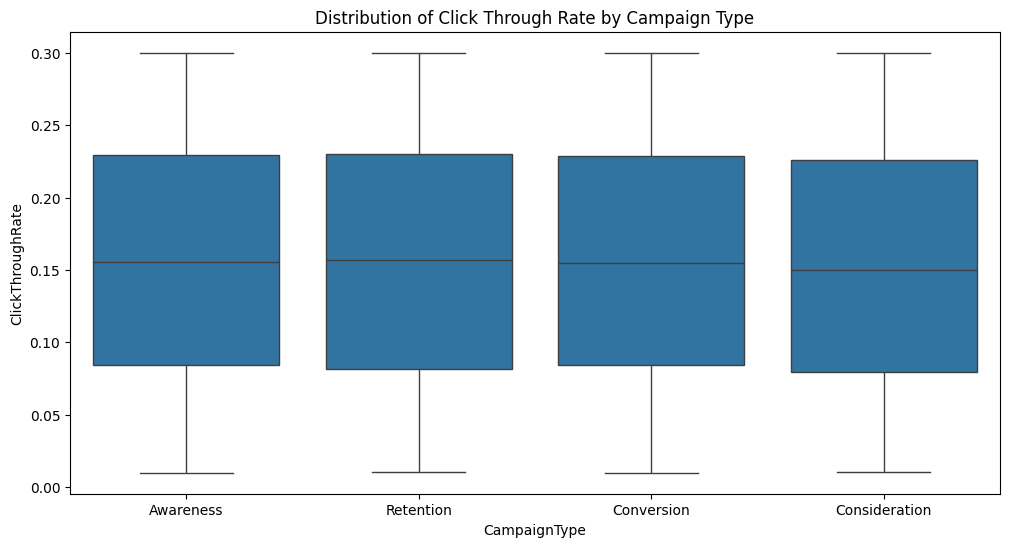

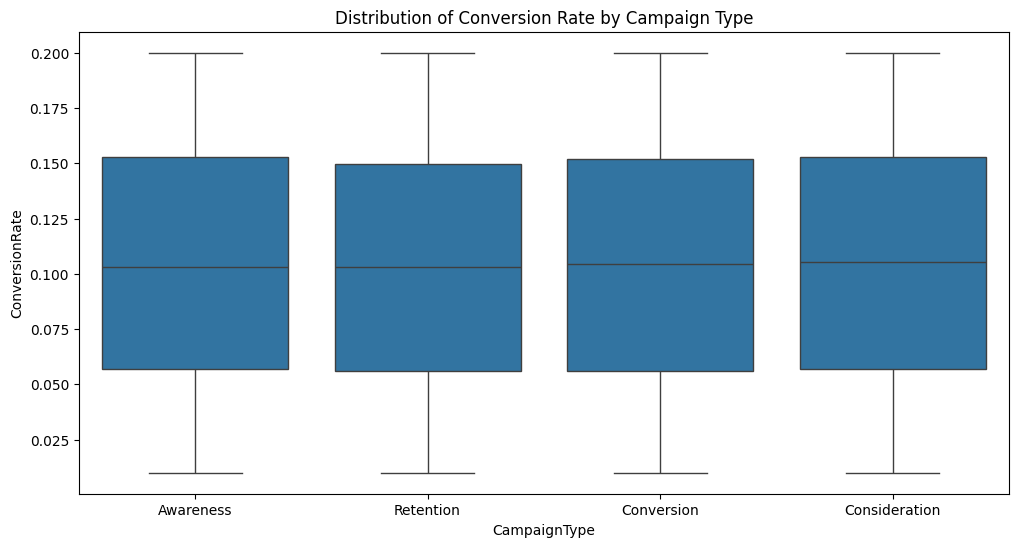

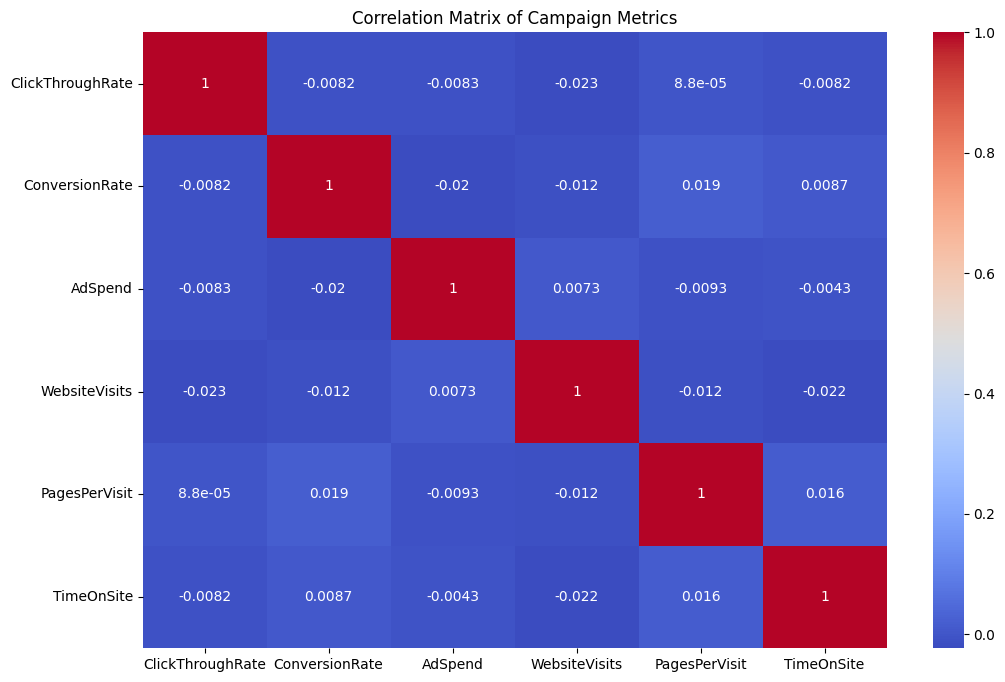

In [9]:
# Campaign Effectiveness: Analyzing Click Through Rate and Conversion Rate by Campaign Type
campaign_effectiveness = marketing_data.groupby('CampaignType').agg({
    'ClickThroughRate': 'mean',
    'ConversionRate': 'mean',
    'AdSpend': 'sum'
}).reset_index()

print(campaign_effectiveness)

# Box Plot for CTR by Campaign Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='CampaignType', y='ClickThroughRate', data=marketing_data)
plt.title('Distribution of Click Through Rate by Campaign Type')
plt.show()

# Box Plot for Conversion Rate by Campaign Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='CampaignType', y='ConversionRate', data=marketing_data)
plt.title('Distribution of Conversion Rate by Campaign Type')
plt.show()

# Heatmap for correlation between different metrics
plt.figure(figsize=(12, 8))
corr = marketing_data[['ClickThroughRate', 'ConversionRate', 'AdSpend', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Campaign Metrics')
plt.show()


In [29]:
pip numpy

ERROR: unknown command "numpy"
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Channel Performance: Analyzing Website Visits, Pages Per Visit, and Time on Site by Campaign Channel
channel_performance = marketing_data.groupby('CampaignChannel').agg({
    'WebsiteVisits': 'mean',
    'PagesPerVisit': 'mean',
    'TimeOnSite': 'mean'
}).reset_index()

print(channel_performance)



  CampaignChannel  WebsiteVisits  PagesPerVisit  TimeOnSite
0           Email      24.878613       5.558488    7.679983
1             PPC      24.155287       5.554004    7.841258
2        Referral      24.890634       5.542450    7.651172
3             SEO      24.740000       5.506669    7.617339
4    Social Media      25.125741       5.586006    7.852198


In [13]:
pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 861.6 kB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection and preprocessing
features = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
X = marketing_data[features]
y = marketing_data['ConversionRate']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0029157755057751034
R-squared: 0.0012638989338642492


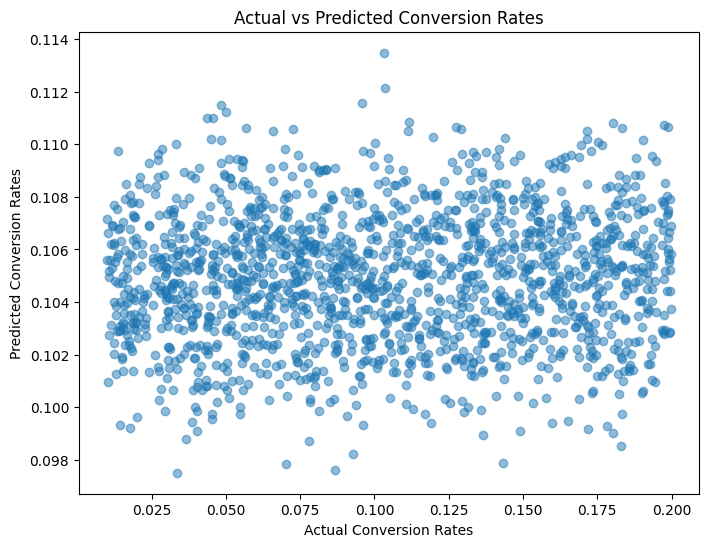

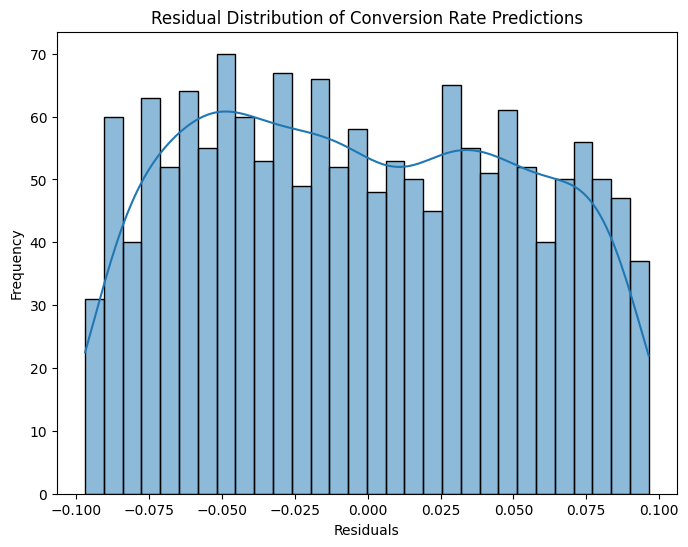

In [15]:
# Scatter Plot for Actual vs Predicted Conversion Rates
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Conversion Rates')
plt.ylabel('Predicted Conversion Rates')
plt.title('Actual vs Predicted Conversion Rates')
plt.show()

# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residual Distribution of Conversion Rate Predictions')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
